In [1]:
#import liberaries
import numpy as np
import pandas as pd

import seaborn as sns


from patsy import dmatrices
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
#load dataset
dataset = pd.read_csv('insurance.csv')

In [3]:
#Preliminary Data Analysis

In [4]:
#get the shape of dataset (no. of rows and columns)
dataset.shape

(3630, 7)

In [5]:
#the dataset contians 3630 rows (obervations) and 7 columns (features)

In [6]:
#view snapshot of dataset (show first 5 rows)
dataset.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [7]:
#get information about datatype and available values for each column in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [8]:
#stattistical view of the dataset
dataset.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# check for missing data
dataset.isnull().sum()

# we found no missing data in our dataset

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [10]:
#Exploratory Data Analysis
# we study each variable/feature in the dataset

In [12]:
dataset['age'].value_counts().head()

age
19.0    74
39.0    72
18.0    70
48.0    56
33.0    49
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Age')

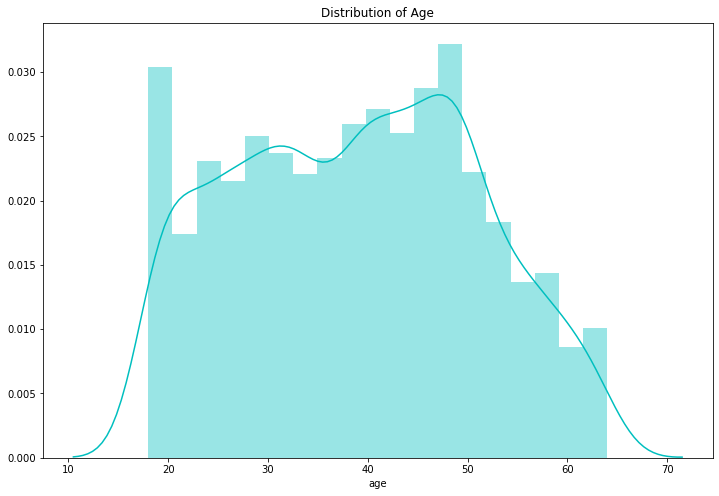

In [12]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(dataset['age'], kde = True, color = 'c')
plt.title('Distribution of Age')

In [13]:
# It is observed that age variable is imbalanced with more data in age 18 and 19 than others 

In [13]:
dataset['sex'].value_counts()

sex
male      2029
female    1601
Name: count, dtype: int64

In [15]:
dataset.groupby('sex')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,1601.0,11663.481779,9154.476211,1615.7667,5972.378000,9916.595977,12680.191480,63770.42801
male,2029.0,13669.601305,11779.296673,1121.8739,5514.509893,8953.504400,18303.140256,62592.87309


In [16]:
# we observed that male in 75th quartile are higher than female otherwise both are similar in others

In [17]:
dataset['region'].value_counts()

region
southeast    1021
northwest     911
southwest     850
northeast     848
Name: count, dtype: int64

In [19]:
dataset.groupby('region')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,848.0,14971.019505,10816.756476,1694.7964,6723.553524,11615.296973,20099.735453,58571.07448
northwest,911.0,11985.709166,9344.957949,1621.3402,5827.362306,10788.741499,12491.682753,60021.39897
southeast,1021.0,13655.955548,12203.307730,1121.8739,6123.998544,9360.924005,14249.395265,63770.42801
southwest,850.0,10413.787260,9610.831096,1241.5650,5020.277438,6722.514131,11666.393368,52590.82939


In [20]:
# we observed that region has not enough effect on insuarance charges, however eatern regions pay more charges

In [21]:
dataset['smoker'].value_counts()

smoker
no     3070
yes     560
Name: count, dtype: int64

In [22]:
dataset.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,3070.0,9218.346820,5635.747702,1121.8739,5246.534327,8489.404511,11346.482104,40160.789435
yes,560.0,32336.661853,11067.969069,12829.4551,21326.373987,34644.993925,41332.530424,63770.428010


In [23]:
# we see that smoking has significant impact on charges

In [24]:
dataset['children'].value_counts()

children
0    619
2    615
5    610
3    605
4    604
1    577
Name: count, dtype: int64

In [25]:
dataset.groupby('children')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,619.0,12486.975530,12265.064346,1121.873900,2710.444575,9850.432000,14431.383625,63770.428010
1,577.0,12215.281187,11517.332696,1711.026800,4766.022000,8186.847719,12913.992400,58571.074480
2,615.0,14762.306603,12740.587317,2353.831297,6257.936443,8902.880180,19462.251608,49577.662400
3,605.0,15620.331132,12304.258506,3443.064000,6551.750100,10702.642400,19533.831200,60021.398970
4,604.0,13069.110093,7483.866194,4508.353792,7079.329867,11093.984451,17348.767687,40160.789435
5,610.0,8538.260470,3206.818567,4687.797000,5590.254375,8741.686253,9898.421469,19023.260000


In [26]:
# It is found that people with 4 or 5 childern pays less charges while people having 3 and less childern pays more than average

In [28]:
#we create bins/groups based on BMI
bins = [0,18.5,25,30, 100]
slots = ['under-weight','healthy','over-weight', 'obese']

dataset['Bmi_range']=pd.cut(dataset['bmi'],bins=bins,labels=slots)
dataset.head()

,age,sex,bmi,smoker,region,children,charges,Bmi_range
0,21.000000,male,25.745000,no,northeast,2,3279.868550,over-weight
1,36.976978,female,25.744165,yes,southeast,3,21454.494239,over-weight
2,18.000000,male,30.030000,no,southeast,1,1720.353700,obese
3,37.000000,male,30.676891,no,northeast,3,6801.437542,obese
4,58.000000,male,32.010000,no,southeast,1,11946.625900,obese


In [29]:
dataset['Bmi_range'].value_counts()

Bmi_range
obese           1862
over-weight     1231
healthy          512
under-weight      25
Name: count, dtype: int64

In [31]:
dataset.groupby('Bmi_range')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
Bmi_range,,,,,,,,
under-weight,25.0,9019.506097,7429.364229,1621.3402,2775.192150,6877.980100,13204.285650,32734.186300
healthy,512.0,10714.629674,6745.052515,1121.8739,5390.611568,9188.004250,15225.652603,35069.374520
over-weight,1231.0,10540.135866,6894.876803,1252.4070,5420.869335,8716.365417,13480.373178,38258.923779
obese,1862.0,14888.598324,13093.280602,1131.5066,6125.198271,10581.875653,16564.915551,63770.428010


In [32]:
# we found that obese people pay more charges

In [33]:
# Data Preprocessing

In [34]:
### Encoding of variables

In [35]:
#converting sex column values to numeric values
dataset["sex"] = dataset["sex"].map({"female":0, "male":1})

In [36]:
#converting smoker column values to numeric values
dataset["smoker"] = dataset["smoker"].map({"yes":0, "no":1})

In [37]:
#converting region column values to numeric values
dataset["region"] = dataset["region"].map({"southwest":0, "southeast":1, "northwest":2, "northeast":3})

In [38]:
# Dataset after preprocessing
dataset.head()

,age,sex,bmi,smoker,region,children,charges,Bmi_range
0,21.000000,1,25.745000,1,3,2,3279.868550,over-weight
1,36.976978,0,25.744165,0,1,3,21454.494239,over-weight
2,18.000000,1,30.030000,1,1,1,1720.353700,obese
3,37.000000,1,30.676891,1,3,3,6801.437542,obese
4,58.000000,1,32.010000,1,1,1,11946.625900,obese


In [39]:
# check for duplicates
dataset.duplicated().sum()

679

In [40]:
# dropping duplicates
dataset.drop_duplicates(keep='last')

,age,sex,bmi,smoker,region,children,charges,Bmi_range
0,21.000000,1,25.745000,1,3,2,3279.868550,over-weight
1,36.976978,0,25.744165,0,1,3,21454.494239,over-weight
2,18.000000,1,30.030000,1,1,1,1720.353700,obese
3,37.000000,1,30.676891,1,3,3,6801.437542,obese
4,58.000000,1,32.010000,1,1,1,11946.625900,obese
...,...,...,...,...,...,...,...,...
3625,48.820767,0,41.426984,1,2,4,10987.324964,obese
3626,38.661977,0,26.202557,1,1,2,11735.844352,over-weight
3627,56.000000,1,40.300000,1,0,0,10602.385000,obese
3628,48.061207,0,34.930624,1,1,1,8976.140452,obese


In [41]:
# we remove bmi_range column to keep all numeric columns in dataset for further steps
dataset = dataset.drop('Bmi_range', axis = 1)

In [42]:
# dropping duplicates
dataset = dataset.drop_duplicates(keep='last')

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2951 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2951 non-null   float64
 1   sex       2951 non-null   int64  
 2   bmi       2951 non-null   float64
 3   smoker    2951 non-null   int64  
 4   region    2951 non-null   int64  
 5   children  2951 non-null   int64  
 6   charges   2951 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 184.4 KB


In [44]:
dataset.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,1,25.745000,1,3,2,3279.868550
1,36.976978,0,25.744165,0,1,3,21454.494239
2,18.000000,1,30.030000,1,1,1,1720.353700
3,37.000000,1,30.676891,1,3,3,6801.437542
4,58.000000,1,32.010000,1,1,1,11946.625900


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

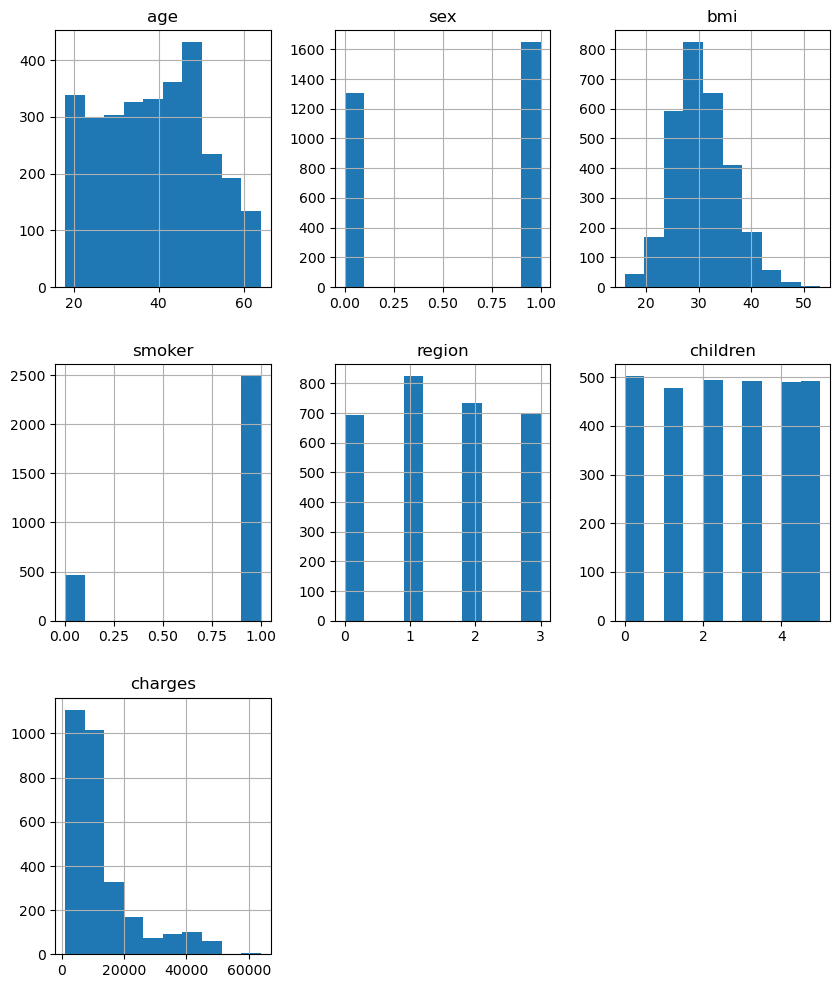

In [45]:
# Check the distribution of each column
dataset.hist(figsize=(10,12))

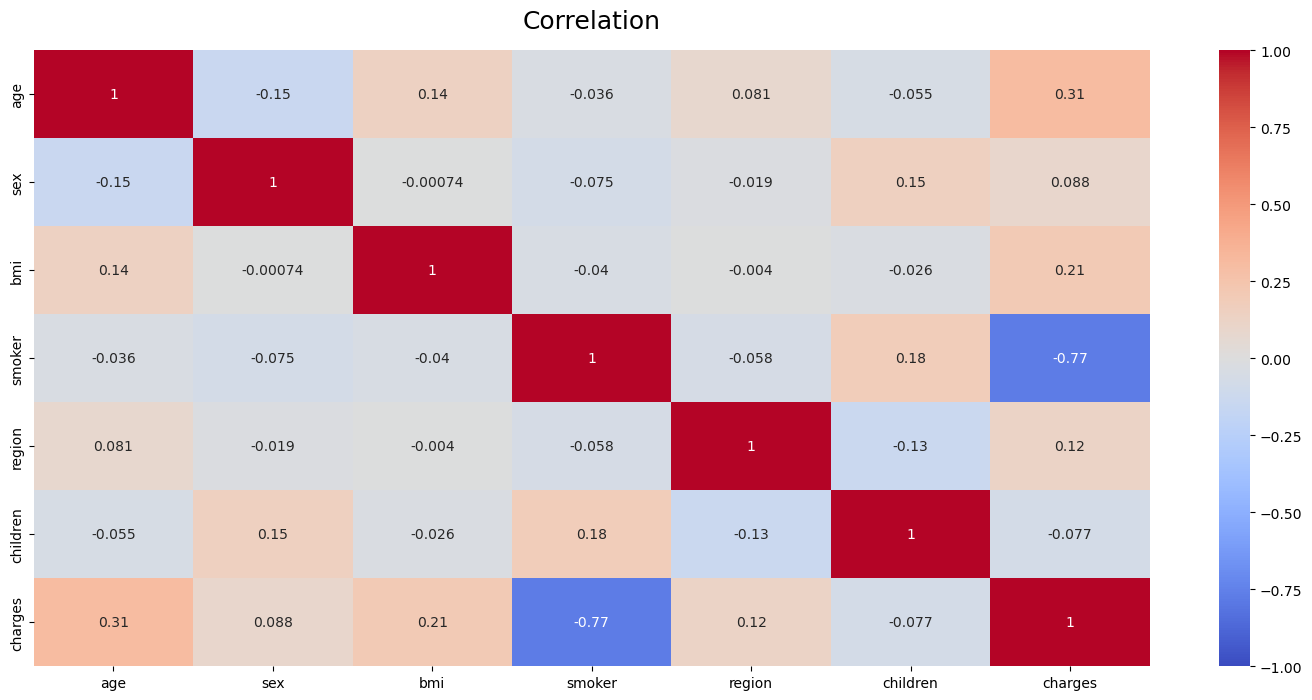

In [46]:
# Selecting only numeric columns
numeric_columns = dataset.select_dtypes(include=['float64', 'int64', 'uint8'])

plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(numeric_columns.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation', fontdict={'fontsize': 18}, pad=16)

plt.show()  # Display the heatmap

In [47]:
# we observed that all variables have correlation with charges (target variable). So we will include all variables in the model

In [48]:
#separating the features and label
X = dataset.drop(["charges"], axis=1)

In [49]:
y = dataset["charges"]

In [50]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [51]:
#splitting X,Y into training and testing set in to 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(2951, 6) (2360, 6) (591, 6)


In [54]:
X_train

,age,sex,bmi,smoker,region,children
2583,64.000000,1,33.880000,0,1,0
350,31.613376,1,36.320957,1,3,4
1563,20.309860,1,27.974178,1,0,5
3029,32.975204,1,33.410430,1,0,5
3273,26.554617,1,29.626531,1,3,4
...,...,...,...,...,...,...
2145,51.000000,1,30.030000,1,1,1
1425,58.000000,1,30.305000,1,3,0
1468,58.000000,0,33.440000,1,2,0
1690,63.000000,0,23.085000,1,3,0


In [55]:
y_train

2583    46889.261200
350     19120.655595
1563     4822.795803
3029     6648.910875
3273    24321.349549
            ...     
2145     9377.904700
1425    11938.255950
1468    12231.613600
1690    14451.835150
1120     5438.749100
Name: charges, Length: 2360, dtype: float64

In [56]:
# Model-1 Linear Regression
from sklearn.linear_model import LinearRegression

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred_lr = lr.predict(X_test)

In [59]:
df1 = pd.DataFrame({"Actual":y_test, "lr":y_pred_lr})

In [61]:
df1

,Actual,lr
1033,18596.516227,7785.986725
333,10977.206300,14307.971647
3400,9490.452718,10104.038235
3166,7441.501000,10177.264191
3516,38511.628300,29427.990489
...,...,...
2563,42661.010648,34660.430421
1856,5241.485063,6131.930730
3538,23945.715754,8525.788821
477,10550.327762,11281.845922


In [62]:
# Evaluating model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [63]:
# calculate R-sqaured value, MAE, MSE, RMSE
print("Linear Regression")
print("R-Squared Value",r2_score(y_test,y_pred_lr))
print ("mean_absolute_error :",mean_absolute_error(y_test,y_pred_lr))
print ("mean_squared_error : ",mean_squared_error(y_test,y_pred_lr))
print ("root_mean_squared_error :",np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression
R-Squared Value 0.7333826584738583
mean_absolute_error : 3880.050171397863
mean_squared_error :  33861549.1440402
root_mean_squared_error : 5819.067721211036


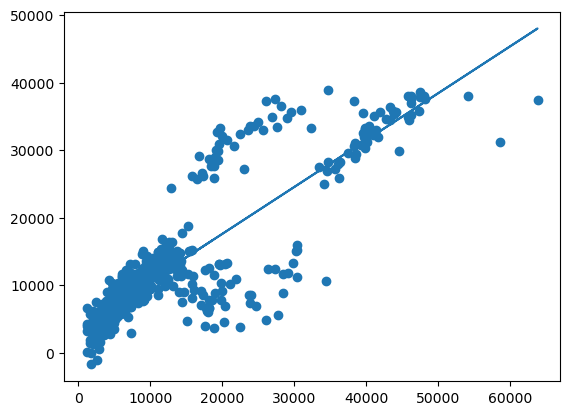

In [64]:
#find line of best fit
a, b = np.polyfit(y_test,y_pred_lr, 1)

#add points to plot
plt.scatter(y_test,y_pred_lr)

#add line of best fit to plot
plt.plot(y_test, a*y_test+b) 

In [61]:
# print regression coefficients (b1,b2,...,bn)
pd.DataFrame(zip(X.columns, lr.coef_))

,0,1
0,age,240.721626
1,sex,1360.865906
2,bmi,269.369243
3,smoker,-22311.661513
4,region,672.676796
5,children,492.630810


In [65]:
# print intercept value (b0)
print(lr.intercept_)

11010.33092577793


In [ ]:
# linear regression model equation

# charges = 11010.33092 + (240.721626)*age + (1360.865906)*sex + (269.369243)*bmi + (-22311.661513)*smoker 
#                       + (672.676796)*region + (492.630810)*children

In [63]:
# Decision tree regression
from sklearn.tree import DecisionTreeRegressor

In [64]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [65]:
y_pred_dtr = dtr.predict(X_test)

In [66]:
# calculate R-sqaured value, MAE, MSE, RMSE
print("Decision Tree Regression")
print("R-Squared Value",r2_score(y_test,y_pred_dtr))
print ("mean_absolute_error :",mean_absolute_error(y_test,y_pred_dtr))
print ("mean_squared_error : ",mean_squared_error(y_test,y_pred_dtr))
print ("root_mean_squared_error :",np.sqrt(mean_squared_error(y_test, y_pred_dtr)))

Decision Tree Regression
R-Squared Value 0.8133369523479367
mean_absolute_error : 1846.120746664817
mean_squared_error :  23707009.92390969
root_mean_squared_error : 4868.984485897413


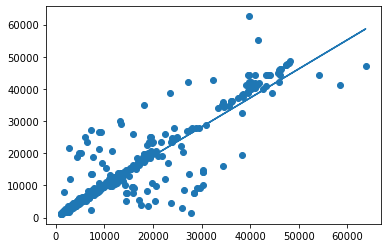

In [67]:
#find line of best fit
a, b = np.polyfit(y_test,y_pred_dtr, 1)

#add points to plot
plt.scatter(y_test,y_pred_dtr)

#add line of best fit to plot
plt.plot(y_test, a*y_test+b) 

In [69]:
# print regression coefficients (b1,b2,...,bn)
pd.DataFrame(zip(X.columns, dtr.feature_importances_))

,0,1
0,age,0.123249
1,sex,0.004944
2,bmi,0.187917
3,smoker,0.590290
4,region,0.041646
5,children,0.051955


In [72]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf  = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
y_pred_rf = rf.predict(X_test)

In [75]:
# calculate R-square value, MAE, MSE, RMSE for Random Forest Regression
print("Random Forest Regression")
print("R-Square Value",r2_score(y_test,y_pred_rf))
print ("mean_absolute_error :",mean_absolute_error(y_test,y_pred_rf))
print ("mean_squared_error : ",mean_squared_error(y_test,y_pred_rf))
print ("root_mean_squared_error :",np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest Regression
R-Square Value 0.8770362348772286
mean_absolute_error : 1798.2886610278024
mean_squared_error :  15616927.060360352
root_mean_squared_error : 3951.8257882098437


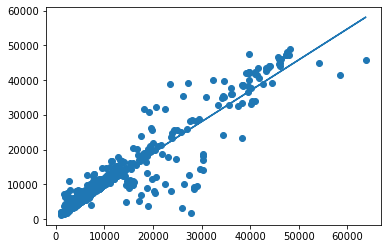

In [76]:
#find line of best fit for RF
a, b = np.polyfit(y_test,y_pred_rf, 1)

#add points to plot
plt.scatter(y_test,y_pred_rf)

#add line of best fit to plot
plt.plot(y_test, a*y_test+b) 

In [77]:
# print regression coefficients (b1,b2,...,bn)
pd.DataFrame(zip(X.columns, rf.feature_importances_))

,0,1
0,age,0.128922
1,sex,0.005230
2,bmi,0.184521
3,smoker,0.587999
4,region,0.036323
5,children,0.057005
